In [1]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [2]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root='../data/',train = True,
                                                transform= trans,download=True)
mnist_test = torchvision.datasets.FashionMNIST(root = '../data/',train=False,
                                               transform = trans,download=True)
len(mnist_train),len(mnist_test)

100%|█████████████████████████████████████████████████████████████████| 26421880/26421880 [00:03<00:00, 6853291.93it/s]


Extracting ../data/FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data/FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 125760.77it/s]


Extracting ../data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data/FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████| 4422102/4422102 [00:10<00:00, 421650.60it/s]


Extracting ../data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data/FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<00:00, 5119079.42it/s]

Extracting ../data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST\raw



(60000, 10000)

In [3]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [5]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirts','trouser','pullover','dress','coat',
                   'sandal','shirt','sneaker','bag','ankle boot']
    return [text_labels[int(i)] for i in labels]

In [14]:
def show_images(imgs,num_rows,num_cols,titles = None,scale =2):
    figsize = (num_cols*scale,scale*num_rows)
    _,axes =d2l.plt.subplots(num_rows,num_cols,figsize = figsize)
    axes = axes.flatten()
    for i,(ax,img) in enumerate(zip(axes,imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

array([<Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 't-shirts'}>,
       <Axes: title={'center': 't-shirts'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 't-shirts'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 't-shirts'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 't-shirts'}>], dtype=object)

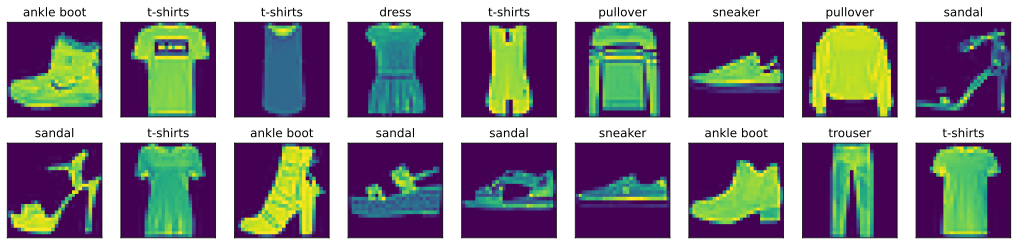

In [15]:
X ,y = next(iter(data.DataLoader(mnist_train,batch_size = 18)))
show_images(X.reshape(18,28,28),2,9,titles=get_fashion_mnist_labels(y))

In [21]:
batch_size = 256
def get_dataloader_workers():
    return 8
train_iter = data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers())

In [22]:
timer = d2l.Timer()
for X,y in train_iter:
    continue
f'{timer.stop():.3f} sec'

'6.157 sec'

In [18]:
def load_data_fashion_mnist(batch_size,resize = None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root='../data/',train=True,transform==trans,download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

SyntaxError: invalid syntax (1540697029.py, line 1)